<a href="https://colab.research.google.com/github/mansiag/LearnDL/blob/master/GanFrog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras import layers
from keras.models import Model
import numpy as np


Using TensorFlow backend.


In [0]:
latent_dim = 32
height = 32
width = 32
channels = 3

In [4]:
#Generator Network
generator_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128*16*16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16,16,128))(x)

x = layers.Conv2D(256,5,padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv

In [5]:
#Discriminator Network
discriminator_input = layers.Input(shape=(height,width,channels))
x = layers.Conv2D(128,3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = Model(inputs=discriminator_input, outputs=x)
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.0001, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')
discriminator.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 128)         262272    
___________________________

In [6]:
#Adversial Network
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(inputs=gan_input, outputs=gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
model_1 (Model)              (None, 32, 32, 3)         6264579   
_________________________________________________________________
model_2 (Model)              (None, 1)                 532737    
Total params: 6,797,316
Trainable params: 6,264,579
Non-trainable params: 532,737
_________________________________________________________________


In [7]:
#Gan Training
import os
from keras.preprocessing import image
from keras.datasets import cifar10

(x_train, y_train), (_,_) = cifar10.load_data()


170500096/170498071 [==============================] - 17s 0us/step


In [0]:
x_train = x_train[y_train.flatten()==6]
x_train = x_train.reshape((x_train.shape[0],height,width,channels)).astype('float32')/255

iterations = 1000
batch_size = 20
save_dir = 'frog'

In [0]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width to 12 and height to 9
fig_size[0] = 4
fig_size[1] = 2
plt.rcParams["figure.figsize"] = fig_size
os.mkdir('frog')


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss:0.43364080786705017
adversial_loss:0.7109673023223877


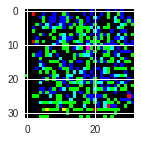

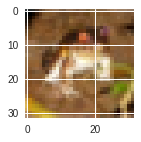

discriminator loss:0.5278083682060242
adversial_loss:0.8704541921615601


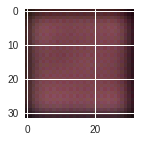

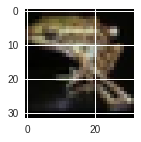

discriminator loss:0.5130245685577393
adversial_loss:0.8044353723526001


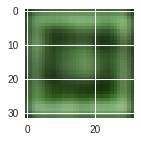

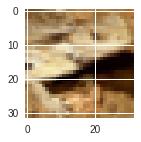

discriminator loss:0.610042154788971
adversial_loss:1.0722053050994873


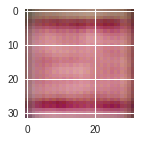

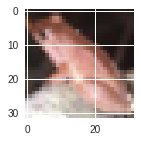

discriminator loss:0.6132057309150696
adversial_loss:0.6417921781539917


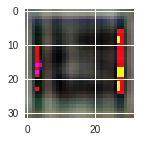

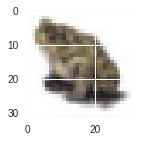

discriminator loss:0.5905581712722778
adversial_loss:1.3584753274917603


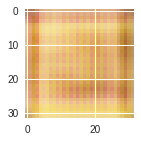

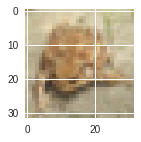

discriminator loss:0.6154939532279968
adversial_loss:1.2051740884780884


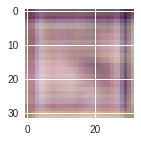

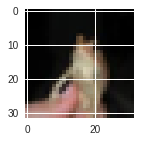

discriminator loss:0.5509911775588989
adversial_loss:2.016227960586548


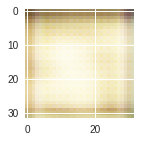

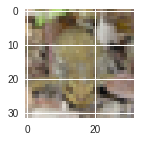

discriminator loss:0.7333545684814453
adversial_loss:0.7204456329345703


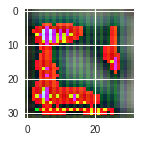

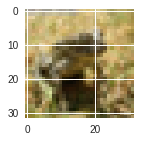

discriminator loss:0.5935615301132202
adversial_loss:0.9750329256057739


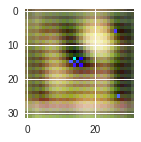

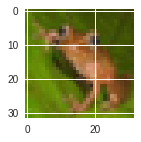

discriminator loss:0.6191884875297546
adversial_loss:1.086446762084961


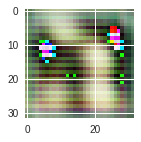

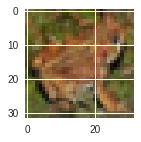

discriminator loss:0.6088934540748596
adversial_loss:0.7729730606079102


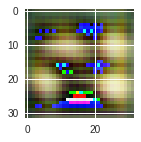

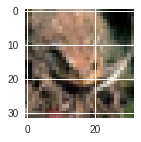

discriminator loss:0.593847930431366
adversial_loss:0.9004484415054321


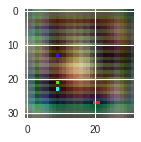

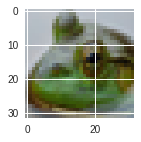

discriminator loss:0.5659948587417603
adversial_loss:1.1914496421813965


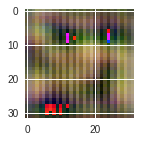

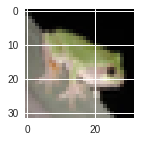

discriminator loss:0.5038981437683105
adversial_loss:1.7133384943008423


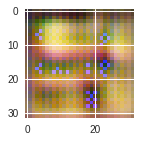

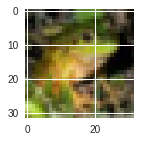

discriminator loss:0.4256977140903473
adversial_loss:1.4022736549377441


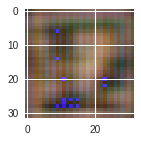

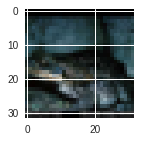

discriminator loss:0.566813051700592
adversial_loss:1.109429955482483


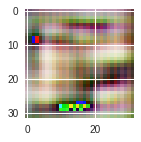

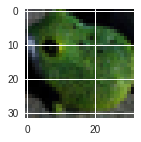

discriminator loss:0.5042253732681274
adversial_loss:1.054441213607788


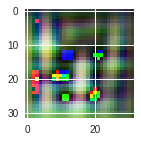

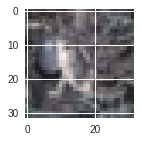

discriminator loss:0.6543763875961304
adversial_loss:0.7152324914932251


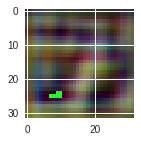

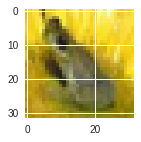

discriminator loss:0.5754500031471252
adversial_loss:1.3770029544830322


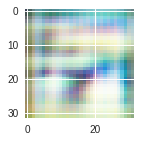

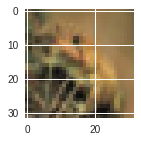

discriminator loss:0.5851589441299438
adversial_loss:0.6419867277145386


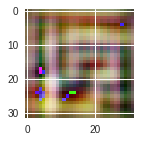

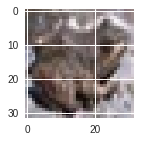

discriminator loss:0.5429710745811462
adversial_loss:1.5104484558105469


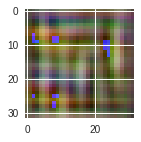

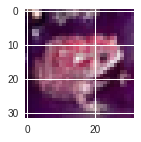

discriminator loss:0.5764895081520081
adversial_loss:1.417226791381836


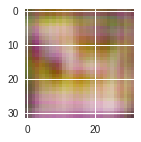

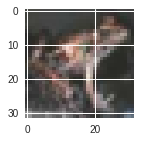

discriminator loss:0.520258367061615
adversial_loss:0.796358585357666


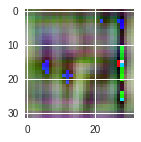

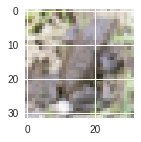

discriminator loss:0.4335409104824066
adversial_loss:1.1085622310638428


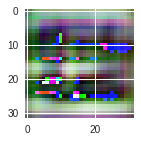

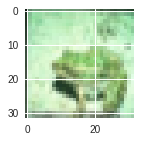

discriminator loss:0.3518253564834595
adversial_loss:1.1987018585205078


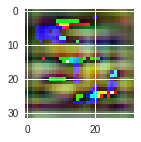

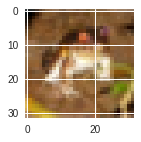

discriminator loss:0.4821088910102844
adversial_loss:1.2953351736068726


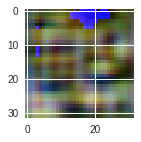

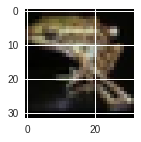

discriminator loss:0.5475215911865234
adversial_loss:1.356532096862793


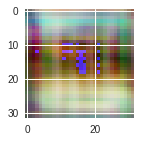

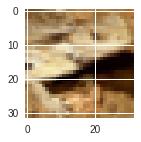

discriminator loss:0.45213666558265686
adversial_loss:1.2080453634262085


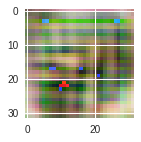

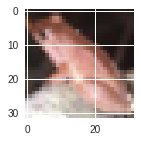

discriminator loss:0.5790951251983643
adversial_loss:1.486090064048767


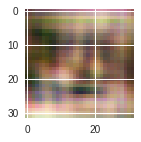

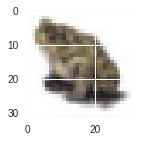

discriminator loss:0.39017122983932495
adversial_loss:1.599716305732727


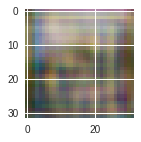

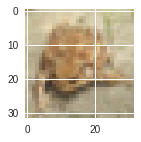

discriminator loss:0.503043532371521
adversial_loss:1.2037556171417236


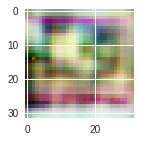

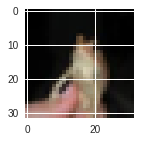

discriminator loss:0.616705596446991
adversial_loss:1.2994533777236938


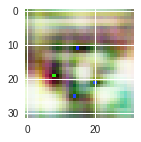

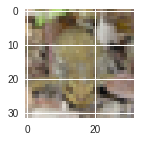

discriminator loss:0.5021321773529053
adversial_loss:1.548849105834961


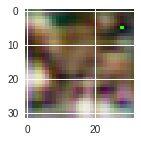

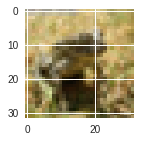

discriminator loss:0.4942995011806488
adversial_loss:1.014154076576233


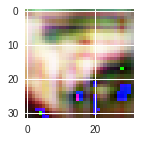

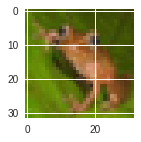

discriminator loss:0.5958349704742432
adversial_loss:1.4856271743774414


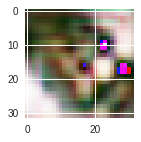

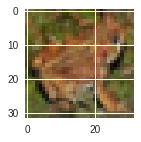

discriminator loss:0.621514618396759
adversial_loss:1.2229610681533813


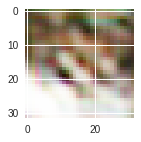

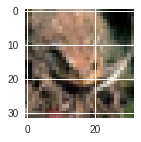

discriminator loss:0.6036802530288696
adversial_loss:0.6302685737609863


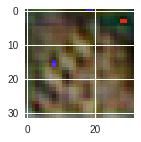

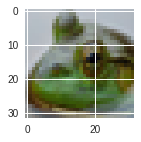

discriminator loss:0.4664570391178131
adversial_loss:1.0802723169326782


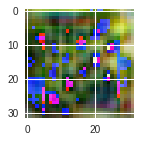

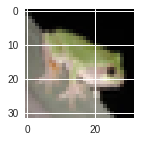

discriminator loss:0.5440598726272583
adversial_loss:1.142948865890503


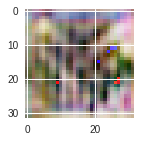

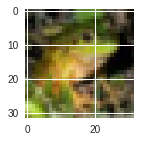

discriminator loss:0.6090938448905945
adversial_loss:0.815862774848938


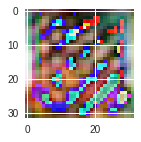

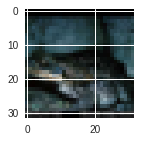

discriminator loss:0.5371246933937073
adversial_loss:1.444417119026184


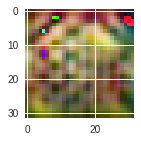

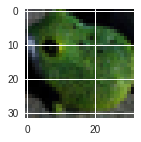

discriminator loss:0.5799599885940552
adversial_loss:0.769626259803772


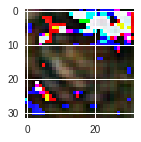

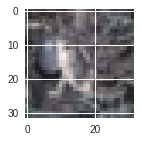

discriminator loss:0.5898901224136353
adversial_loss:1.2049452066421509


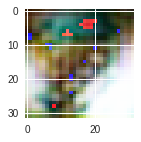

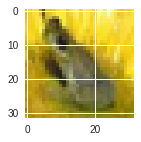

discriminator loss:0.5368919968605042
adversial_loss:0.8904471397399902


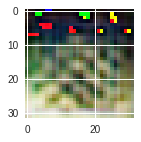

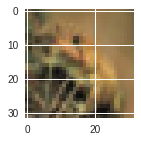

discriminator loss:0.578050971031189
adversial_loss:1.1541006565093994


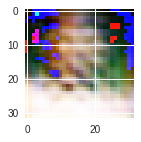

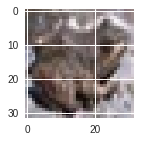

discriminator loss:0.6168058514595032
adversial_loss:1.4308055639266968


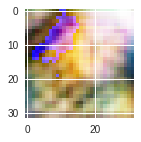

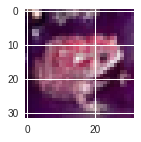

discriminator loss:0.6008819341659546
adversial_loss:0.8356962203979492


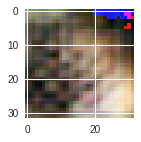

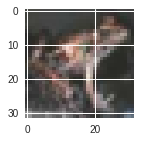

discriminator loss:0.5318320989608765
adversial_loss:0.8665716052055359


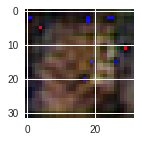

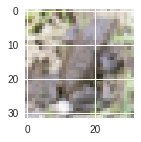

discriminator loss:0.5019369125366211
adversial_loss:1.2794746160507202


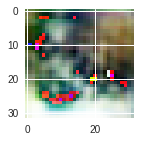

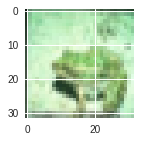

discriminator loss:0.5454512238502502
adversial_loss:0.7633804082870483


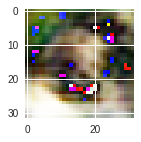

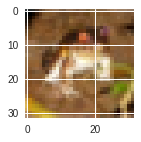

discriminator loss:0.446674644947052
adversial_loss:1.4898595809936523


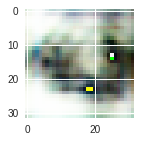

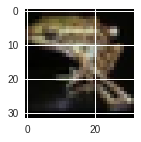

discriminator loss:0.6246187090873718
adversial_loss:1.4396992921829224


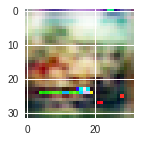

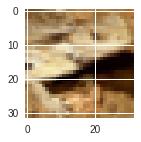

discriminator loss:0.6494137048721313
adversial_loss:1.1796890497207642


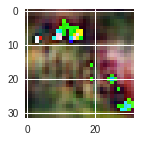

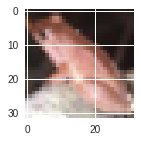

discriminator loss:0.603851318359375
adversial_loss:0.7779213786125183


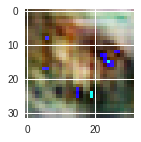

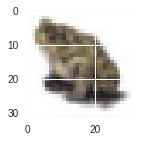

discriminator loss:0.5599797964096069
adversial_loss:0.8091767430305481


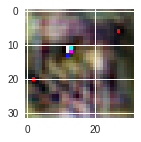

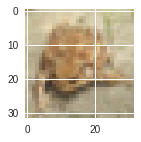

discriminator loss:0.5323687195777893
adversial_loss:1.1017389297485352


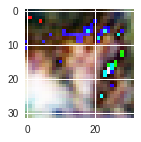

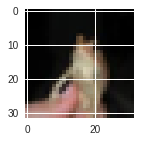

discriminator loss:0.5665057301521301
adversial_loss:0.9112600088119507


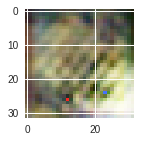

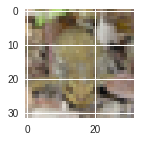

discriminator loss:0.4384972155094147
adversial_loss:1.1147639751434326


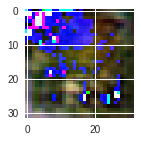

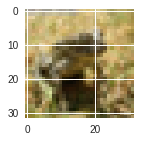

discriminator loss:0.5301939249038696
adversial_loss:0.7090069651603699


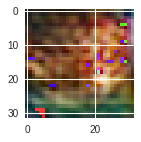

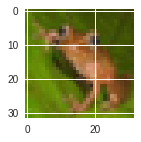

discriminator loss:0.45345425605773926
adversial_loss:1.0535987615585327


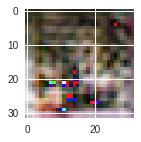

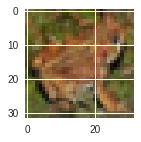

discriminator loss:0.6060513257980347
adversial_loss:1.2647209167480469


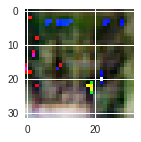

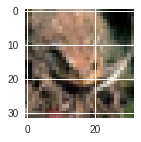

discriminator loss:0.5378447771072388
adversial_loss:1.2885898351669312


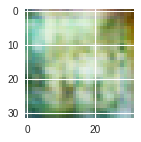

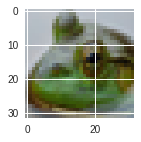

discriminator loss:0.6218730211257935
adversial_loss:1.232177734375


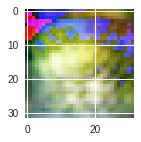

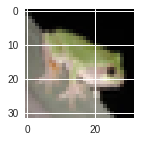

discriminator loss:0.49762654304504395
adversial_loss:1.8259776830673218


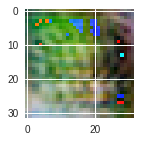

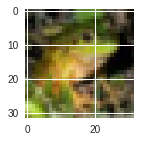

discriminator loss:0.6314961314201355
adversial_loss:1.6418049335479736


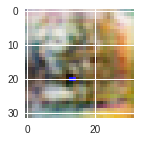

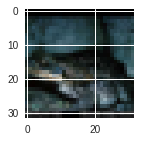

discriminator loss:0.5954524278640747
adversial_loss:0.9136337041854858


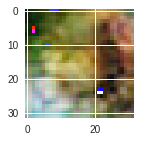

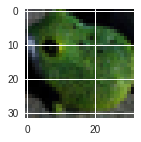

discriminator loss:0.5332364439964294
adversial_loss:0.9337918162345886


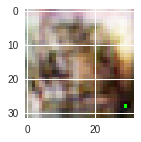

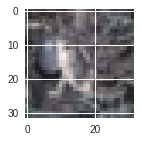

discriminator loss:0.6462265253067017
adversial_loss:0.6543723344802856


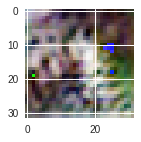

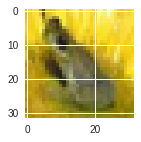

discriminator loss:0.5670026540756226
adversial_loss:1.2574464082717896


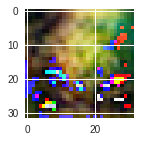

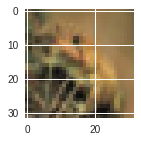

discriminator loss:0.6443616151809692
adversial_loss:1.0524953603744507


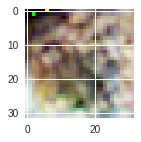

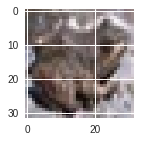

discriminator loss:0.5490473508834839
adversial_loss:1.0569953918457031


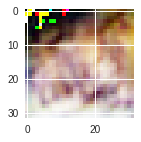

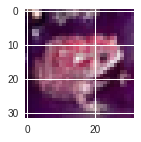

discriminator loss:0.6015676259994507
adversial_loss:0.8224156498908997


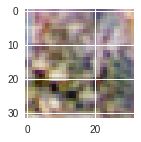

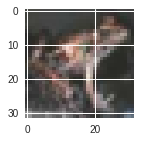

discriminator loss:0.5911567807197571
adversial_loss:0.6925243139266968


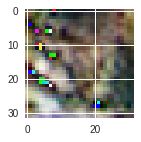

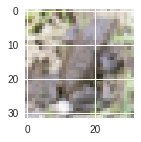

discriminator loss:0.6587527990341187
adversial_loss:0.9082132577896118


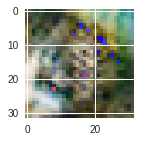

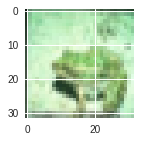

discriminator loss:0.5673297643661499
adversial_loss:0.9639526605606079


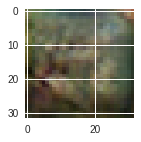

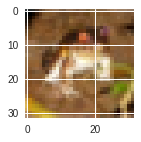

discriminator loss:0.5907963514328003
adversial_loss:0.8356261253356934


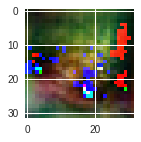

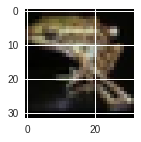

discriminator loss:0.5687624216079712
adversial_loss:1.0866621732711792


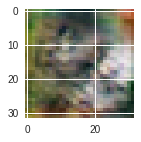

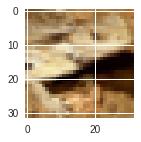

discriminator loss:0.5568214654922485
adversial_loss:1.2995243072509766


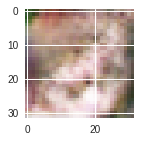

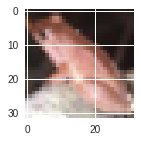

discriminator loss:0.5670992732048035
adversial_loss:1.182759165763855


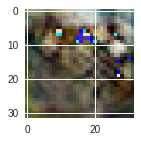

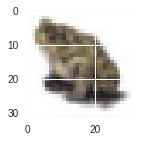

discriminator loss:0.5312108397483826
adversial_loss:1.245909333229065


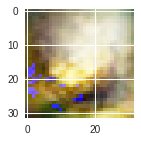

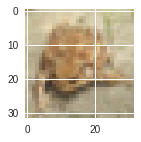

discriminator loss:0.6017030477523804
adversial_loss:1.2096017599105835


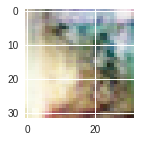

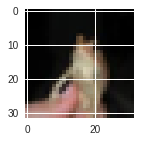

discriminator loss:0.4675811231136322
adversial_loss:1.3660519123077393


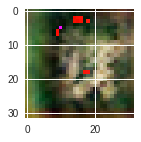

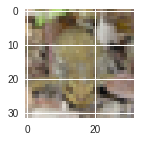

discriminator loss:0.58301842212677
adversial_loss:1.2784210443496704


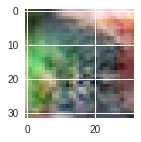

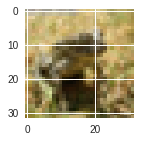

discriminator loss:0.5634644627571106
adversial_loss:0.9144169688224792


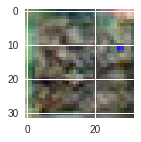

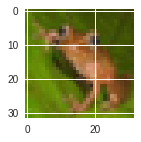

discriminator loss:0.48522692918777466
adversial_loss:1.0043504238128662


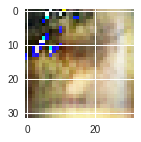

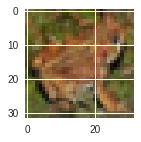

discriminator loss:0.528459370136261
adversial_loss:0.8717500567436218


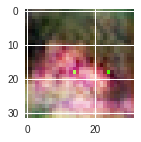

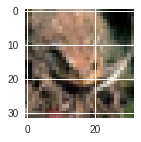

discriminator loss:0.35169702768325806
adversial_loss:1.6056416034698486


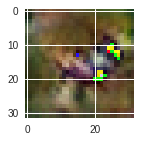

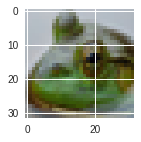

discriminator loss:0.6335559487342834
adversial_loss:1.2535336017608643


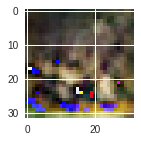

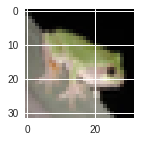

discriminator loss:0.5149244070053101
adversial_loss:0.8423138856887817


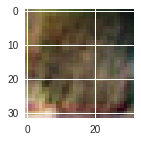

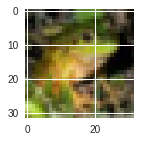

discriminator loss:0.5679994821548462
adversial_loss:0.6717215776443481


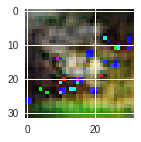

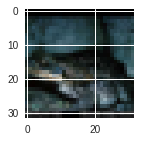

discriminator loss:0.5172730684280396
adversial_loss:1.0018198490142822


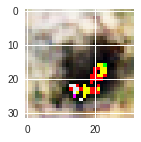

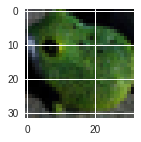

discriminator loss:0.6096013188362122
adversial_loss:1.1940196752548218


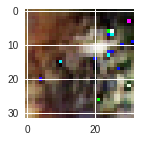

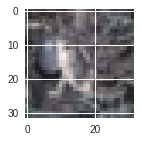

discriminator loss:0.5733187794685364
adversial_loss:0.8366192579269409


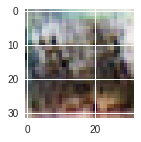

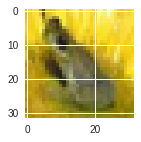

discriminator loss:0.5039801001548767
adversial_loss:1.3936443328857422


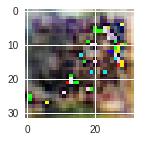

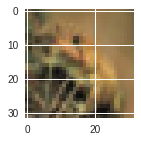

discriminator loss:0.6753319501876831
adversial_loss:1.4029123783111572


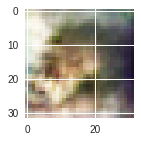

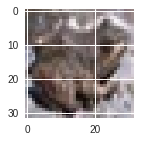

discriminator loss:0.5591036081314087
adversial_loss:1.3882496356964111


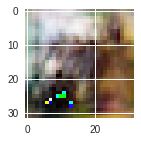

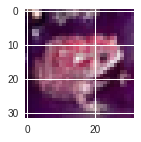

discriminator loss:0.5652852058410645
adversial_loss:1.331075668334961


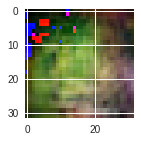

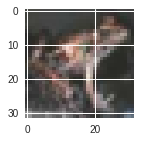

discriminator loss:0.517961323261261
adversial_loss:1.3057539463043213


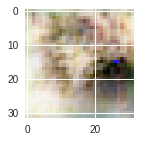

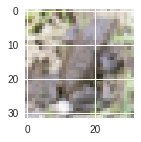

discriminator loss:0.6071910858154297
adversial_loss:1.4130562543869019


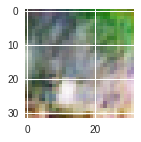

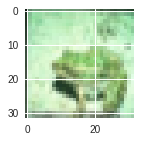

In [10]:
start = 0
k = 5
for step in range(iterations):
  for i in range(k):
    random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
    generated_images = generator.predict(random_latent_vectors)
    stop = start+batch_size
    real_images = x_train[start:stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([np.ones((batch_size, 1)),np.zeros((batch_size,1))])
    labels += 0.05*np.random.random(labels.shape)
    d_loss = discriminator.train_on_batch(combined_images, labels)
  
  random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
  
  misleading_targets = np.zeros((batch_size,1))
  a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
  
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0
    
  if step%10 == 0:
    gan.save_weights('gan.h5')
    
    print('discriminator loss:{}'.format(d_loss))
    print('adversial_loss:{}'.format(a_loss))
    
    img = image.array_to_img(generated_images[0]*255., scale=False)
    # Get current size
    
    plt.imshow(img)
    plt.show()
    img.save(os.path.join(save_dir,'generated_frog'+str(step)+'.png'))
    
    img = image.array_to_img(real_images[0]*255., scale=False)
    img.save(os.path.join(save_dir,'real_frog'+str(step)+'.png'))
    plt.imshow(img)
    plt.show()

In [0]:
import matplotlib.pyplot as plt

In [0]:
img = x_train[0]
fig_size = plt.rcParams["figure.figsize"]
 
    # Prints: [8.0, 6.0]
print("Current size:{}".format(fig_size))
 

Current size:[8.0, 5.5]


In [0]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
model_1 (Model)              (None, 32, 32, 3)         6264579   
_________________________________________________________________
model_2 (Model)              (None, 1)                 532737    
Total params: 6,797,316
Trainable params: 6,264,579
Non-trainable params: 532,737
_________________________________________________________________


In [0]:
!cd frog

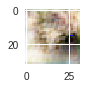

In [22]:
from PIL import Image
img = Image.open("frog/generated_frog980.png")
plt.imshow(img)

In [0]:
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width to 12 and height to 9
fig_size[0] = 2
fig_size[1] = 1
plt.rcParams["figure.figsize"] = fig_size

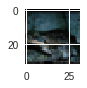

In [18]:
from PIL import Image
img = Image.open("frog/real_frog900.png")
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss:0.5609593391418457
adversial_loss:1.0983402729034424


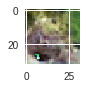

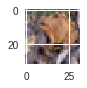

discriminator loss:0.5209673047065735
adversial_loss:0.944061279296875


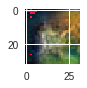

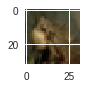

discriminator loss:0.49646225571632385
adversial_loss:0.9338388442993164


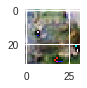

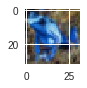

discriminator loss:0.6119219660758972
adversial_loss:1.0730901956558228


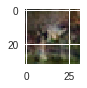

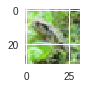

discriminator loss:0.6716127991676331
adversial_loss:0.6589725017547607


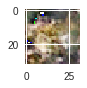

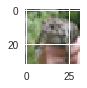

discriminator loss:0.5442531704902649
adversial_loss:0.9764512181282043


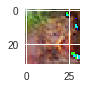

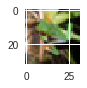

discriminator loss:0.6236222982406616
adversial_loss:1.492506742477417


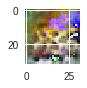

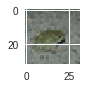

discriminator loss:0.5718550682067871
adversial_loss:1.175787091255188


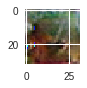

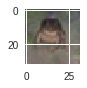

discriminator loss:0.5449684858322144
adversial_loss:0.7604334950447083


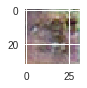

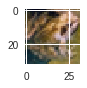

discriminator loss:0.5634839534759521
adversial_loss:0.8232890367507935


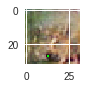

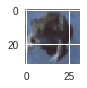

In [28]:
start = 0
k = 5
iterations = 100
for step in range(iterations):
  for i in range(k):
    random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
    generated_images = generator.predict(random_latent_vectors)
    stop = start+batch_size
    real_images = x_train[start:stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([np.ones((batch_size, 1)),np.zeros((batch_size,1))])
    labels += 0.05*np.random.random(labels.shape)
    d_loss = discriminator.train_on_batch(combined_images, labels)
  
  random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
  
  misleading_targets = np.zeros((batch_size,1))
  a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
  
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0
    
  if step%10 == 0:
    gan.save_weights('gan.h5')
    
    print('discriminator loss:{}'.format(d_loss))
    print('adversial_loss:{}'.format(a_loss))
    
    img = image.array_to_img(generated_images[19]*255., scale=False)
    # Get current size
    
    plt.imshow(img)
    plt.show()
    img.save(os.path.join(save_dir,'generated_2frog'+str(step)+'.png'))
    
    img = image.array_to_img(real_images[19]*255., scale=False)
    img.save(os.path.join(save_dir,'real_2frog'+str(step)+'.png'))
    plt.imshow(img)

    plt.show()

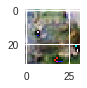

In [29]:
#One of the generated image which looks real
from PIL import Image
img = Image.open("frog/generated_2frog20.png")
plt.imshow(img)

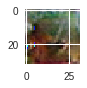

In [31]:
from PIL import Image
img = Image.open("frog/generated_2frog70.png")
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss:0.5765177011489868
adversial_loss:1.099704384803772


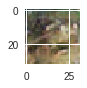

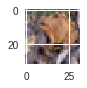

discriminator loss:0.5763340592384338
adversial_loss:1.1682571172714233


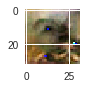

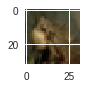

discriminator loss:0.5858811736106873
adversial_loss:1.0114939212799072


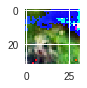

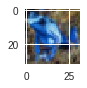

discriminator loss:0.5727354288101196
adversial_loss:1.3488667011260986


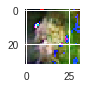

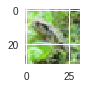

discriminator loss:0.5104442834854126
adversial_loss:1.1524333953857422


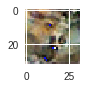

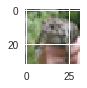

discriminator loss:0.5698726177215576
adversial_loss:1.3112033605575562


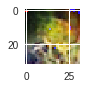

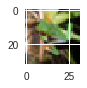

discriminator loss:0.4477483332157135
adversial_loss:1.659196138381958


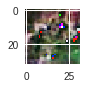

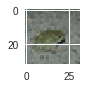

discriminator loss:0.5564718246459961
adversial_loss:1.208972692489624


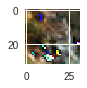

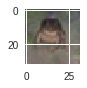

discriminator loss:0.5543994903564453
adversial_loss:1.3949869871139526


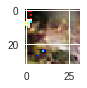

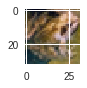

discriminator loss:0.6257013082504272
adversial_loss:0.8553309440612793


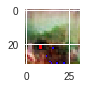

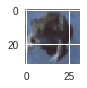

discriminator loss:0.6524697542190552
adversial_loss:1.0718867778778076


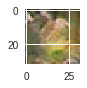

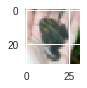

discriminator loss:0.5907466411590576
adversial_loss:1.0237864255905151


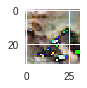

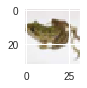

discriminator loss:0.6138654947280884
adversial_loss:1.1310278177261353


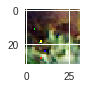

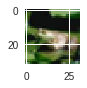

discriminator loss:0.6246967911720276
adversial_loss:0.6827911138534546


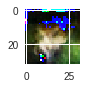

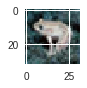

discriminator loss:0.6348158717155457
adversial_loss:1.2470524311065674


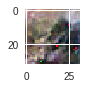

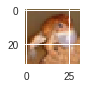

discriminator loss:0.6366639137268066
adversial_loss:0.6715162992477417


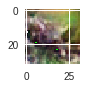

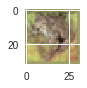

discriminator loss:0.5525869727134705
adversial_loss:1.032047986984253


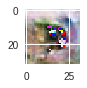

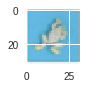

discriminator loss:0.6779670715332031
adversial_loss:0.6808844804763794


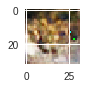

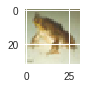

discriminator loss:0.6175787448883057
adversial_loss:1.117811918258667


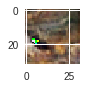

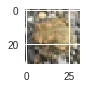

discriminator loss:0.5362445116043091
adversial_loss:1.4703409671783447


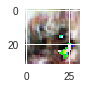

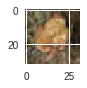

discriminator loss:0.5664688348770142
adversial_loss:1.27382493019104


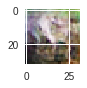

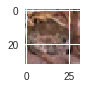

discriminator loss:0.5376846194267273
adversial_loss:0.9203310012817383


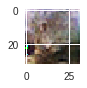

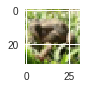

discriminator loss:0.6105058789253235
adversial_loss:0.7125133275985718


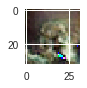

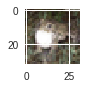

discriminator loss:0.5843020081520081
adversial_loss:0.9268609285354614


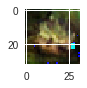

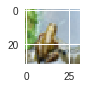

discriminator loss:0.5413267612457275
adversial_loss:0.9950916171073914


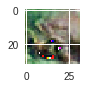

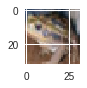

discriminator loss:0.5820461511611938
adversial_loss:0.857949435710907


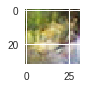

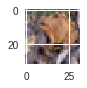

discriminator loss:0.5533357858657837
adversial_loss:1.091665267944336


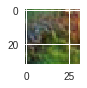

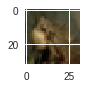

discriminator loss:0.534113883972168
adversial_loss:1.173335075378418


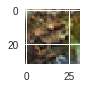

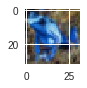

discriminator loss:0.605908215045929
adversial_loss:0.9397501945495605


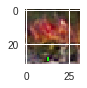

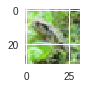

discriminator loss:0.5513965487480164
adversial_loss:1.2606357336044312


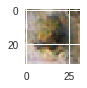

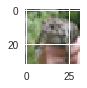

discriminator loss:0.5895127654075623
adversial_loss:0.9978092908859253


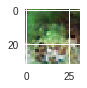

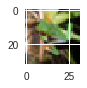

discriminator loss:0.48329466581344604
adversial_loss:1.3627727031707764


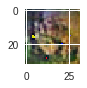

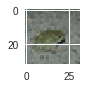

discriminator loss:0.5176733136177063
adversial_loss:1.1707253456115723


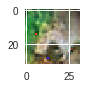

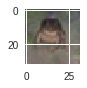

discriminator loss:0.5680724382400513
adversial_loss:1.119187355041504


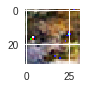

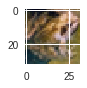

discriminator loss:0.5946711301803589
adversial_loss:0.7495150566101074


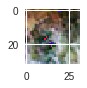

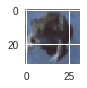

discriminator loss:0.6809660792350769
adversial_loss:1.215301513671875


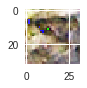

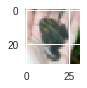

discriminator loss:0.6201336979866028
adversial_loss:1.5440008640289307


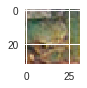

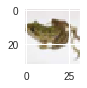

discriminator loss:0.5389525890350342
adversial_loss:0.8535724878311157


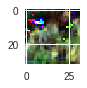

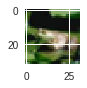

discriminator loss:0.6079150438308716
adversial_loss:0.7099893689155579


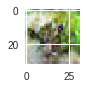

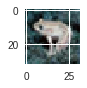

discriminator loss:0.6049278974533081
adversial_loss:1.0127317905426025


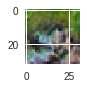

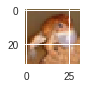

discriminator loss:0.6161521077156067
adversial_loss:0.857769787311554


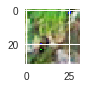

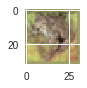

discriminator loss:0.5218952298164368
adversial_loss:1.354984998703003


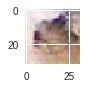

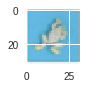

discriminator loss:0.623356282711029
adversial_loss:0.8546821475028992


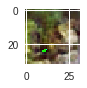

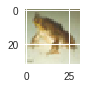

discriminator loss:0.5823630094528198
adversial_loss:1.1650094985961914


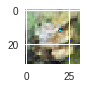

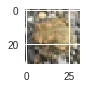

discriminator loss:0.5971542596817017
adversial_loss:1.2695401906967163


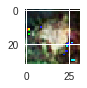

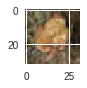

discriminator loss:0.5692102313041687
adversial_loss:1.3466973304748535


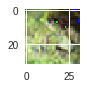

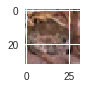

discriminator loss:0.5594990849494934
adversial_loss:0.8470022082328796


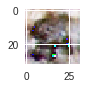

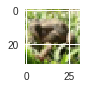

discriminator loss:0.5991252660751343
adversial_loss:0.9252832531929016


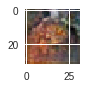

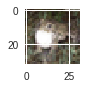

discriminator loss:0.5578017234802246
adversial_loss:0.9465417861938477


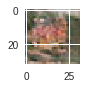

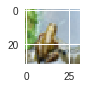

discriminator loss:0.5062215328216553
adversial_loss:1.2415319681167603


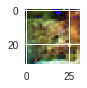

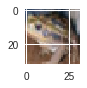

discriminator loss:0.6485576033592224
adversial_loss:0.6289206743240356


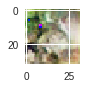

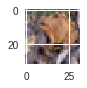

discriminator loss:0.49147090315818787
adversial_loss:1.429229497909546


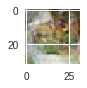

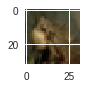

discriminator loss:0.5639602541923523
adversial_loss:0.9034881591796875


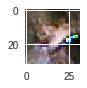

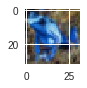

discriminator loss:0.632538914680481
adversial_loss:0.8252211809158325


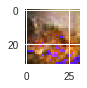

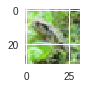

discriminator loss:0.6270882487297058
adversial_loss:1.331268548965454


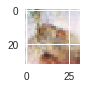

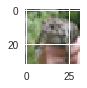

discriminator loss:0.5686750411987305
adversial_loss:1.6422466039657593


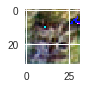

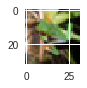

discriminator loss:0.517253041267395
adversial_loss:2.02508544921875


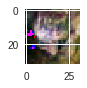

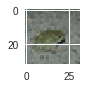

discriminator loss:0.582711398601532
adversial_loss:1.223071813583374


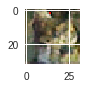

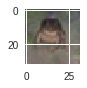

discriminator loss:0.5533342361450195
adversial_loss:1.2742340564727783


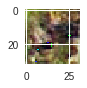

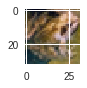

discriminator loss:0.5738528370857239
adversial_loss:0.8818906545639038


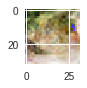

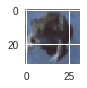

discriminator loss:0.6680448055267334
adversial_loss:0.6014197468757629


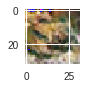

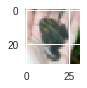

discriminator loss:0.5984905958175659
adversial_loss:1.0006177425384521


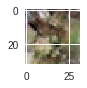

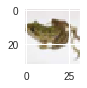

discriminator loss:0.5489621758460999
adversial_loss:0.7649530172348022


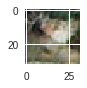

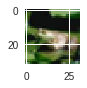

discriminator loss:0.6094872355461121
adversial_loss:0.9322683215141296


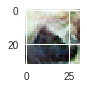

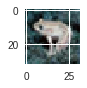

discriminator loss:0.5829607248306274
adversial_loss:1.1358391046524048


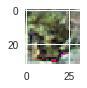

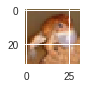

discriminator loss:0.6092449426651001
adversial_loss:0.8259612321853638


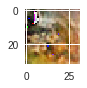

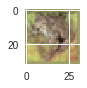

discriminator loss:0.5665886998176575
adversial_loss:1.0255024433135986


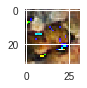

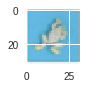

discriminator loss:0.5988041758537292
adversial_loss:0.9097973108291626


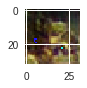

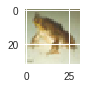

discriminator loss:0.5870033502578735
adversial_loss:1.2234262228012085


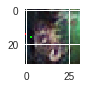

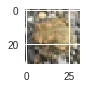

discriminator loss:0.5138140916824341
adversial_loss:1.0833685398101807


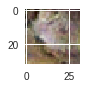

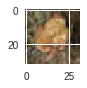

discriminator loss:0.5345795154571533
adversial_loss:0.9440318942070007


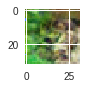

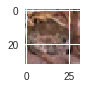

discriminator loss:0.515518307685852
adversial_loss:1.068129539489746


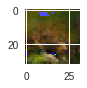

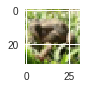

discriminator loss:0.5984744429588318
adversial_loss:0.9532694816589355


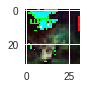

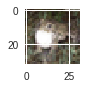

discriminator loss:0.5967909097671509
adversial_loss:1.0176194906234741


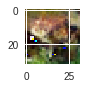

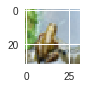

discriminator loss:0.6456422805786133
adversial_loss:1.1350061893463135


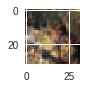

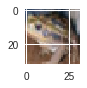

discriminator loss:0.598440945148468
adversial_loss:1.0831621885299683


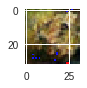

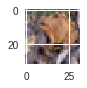

discriminator loss:0.6177234649658203
adversial_loss:1.0455442667007446


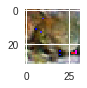

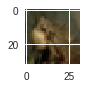

discriminator loss:0.5250967741012573
adversial_loss:1.3099788427352905


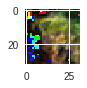

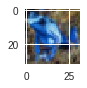

discriminator loss:0.5971285700798035
adversial_loss:0.7978249192237854


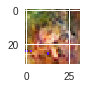

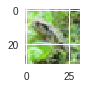

discriminator loss:0.573839008808136
adversial_loss:0.9935188293457031


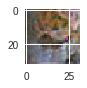

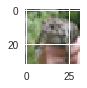

discriminator loss:0.5117104649543762
adversial_loss:1.2392038106918335


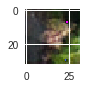

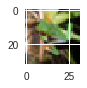

discriminator loss:0.45294302701950073
adversial_loss:1.3618133068084717


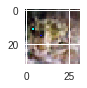

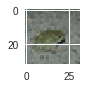

discriminator loss:0.5455578565597534
adversial_loss:1.2683676481246948


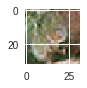

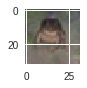

discriminator loss:0.5729754567146301
adversial_loss:0.9821411371231079


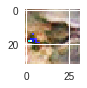

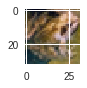

discriminator loss:0.6048949956893921
adversial_loss:0.9954898953437805


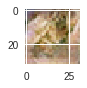

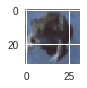

discriminator loss:0.6816185712814331
adversial_loss:1.3261563777923584


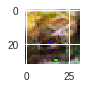

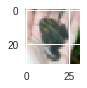

discriminator loss:0.5181580781936646
adversial_loss:1.5927661657333374


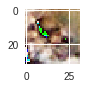

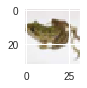

discriminator loss:0.5801486372947693
adversial_loss:1.10254967212677


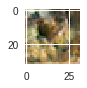

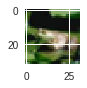

discriminator loss:0.534886360168457
adversial_loss:1.0370548963546753


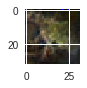

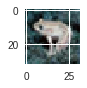

discriminator loss:0.6385842561721802
adversial_loss:0.9905245900154114


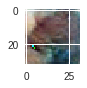

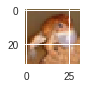

discriminator loss:0.6324697732925415
adversial_loss:1.2353670597076416


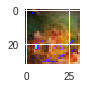

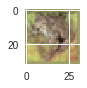

discriminator loss:0.6231893301010132
adversial_loss:1.002659559249878


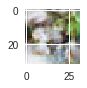

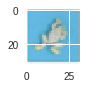

discriminator loss:0.5966807007789612
adversial_loss:1.0403573513031006


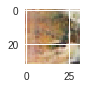

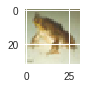

discriminator loss:0.5771282315254211
adversial_loss:1.0064442157745361


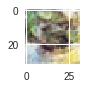

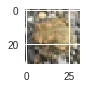

discriminator loss:0.6086487174034119
adversial_loss:1.0161917209625244


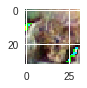

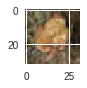

discriminator loss:0.6029874086380005
adversial_loss:1.0141589641571045


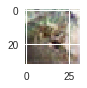

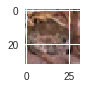

discriminator loss:0.46907997131347656
adversial_loss:1.1740225553512573


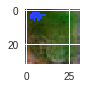

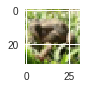

discriminator loss:0.598386287689209
adversial_loss:1.1170908212661743


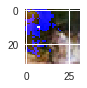

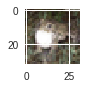

discriminator loss:0.47483497858047485
adversial_loss:1.352577805519104


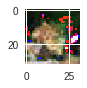

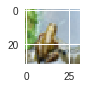

discriminator loss:0.5658537149429321
adversial_loss:1.0164175033569336


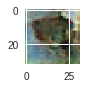

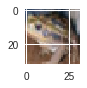

In [33]:
#Running Again
start = 0
k = 5
iterations = 1000
for step in range(iterations):
  for i in range(k):
    random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
    generated_images = generator.predict(random_latent_vectors)
    stop = start+batch_size
    real_images = x_train[start:stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([np.ones((batch_size, 1)),np.zeros((batch_size,1))])
    labels += 0.05*np.random.random(labels.shape)
    d_loss = discriminator.train_on_batch(combined_images, labels)
  
  random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
  
  misleading_targets = np.zeros((batch_size,1))
  a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
  
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0
    
  if step%10 == 0:
    gan.save_weights('gan.h5')
    
    print('discriminator loss:{}'.format(d_loss))
    print('adversial_loss:{}'.format(a_loss))
    
    img = image.array_to_img(generated_images[19]*255., scale=False)
    # Get current size
    
    plt.imshow(img)
    plt.show()
    img.save(os.path.join(save_dir,'generated_3frog'+str(step)+'.png'))
    
    img = image.array_to_img(real_images[19]*255., scale=False)
    img.save(os.path.join(save_dir,'real_3frog'+str(step)+'.png'))
    plt.imshow(img)

    plt.show()